In [57]:
# Importing all the libraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# loading all the dataset

df = pd.read_csv("/content/dataset.csv")


In [59]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [61]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [62]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [63]:
df.columns=df.columns.str.replace(' ','_')

In [64]:
df.columns=df.columns.str.lower()

In [65]:
df.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

In [66]:
df.shape

(112634, 17)

In [67]:
df.isnull().sum()

,0
vin_(1-10),0
county,0
city,0
state,0
postal_code,0
model_year,0
make,0
model,20
electric_vehicle_type,0
clean_alternative_fuel_vehicle_(cafv)_eligibility,0


In [68]:
df.duplicated().sum()

0

In [69]:
df['model'].value_counts()

,count
model,
MODEL 3,23135
MODEL Y,17142
LEAF,12880
MODEL S,7377
BOLT EV,4910
...,...
745LE,2
S-10 PICKUP,1
SOLTERRA,1


In [70]:
df['legislative_district'].value_counts()

,count
legislative_district,
41.0,7605
45.0,7112
48.0,6462
36.0,5251
46.0,4723
1.0,4715
5.0,4694
43.0,4621
37.0,3556


In [71]:
df['vehicle_location'].value_counts()

,count
vehicle_location,
POINT (-122.13158 47.67858),2916
POINT (-122.2066 47.67887),2059
POINT (-122.1872 47.61001),2001
POINT (-122.31765 47.70013),1880
POINT (-122.12096 47.55584),1852
...,...
POINT (-124.33152 48.05431),1
POINT (-77.41203 39.41574),1
POINT (-123.61022 46.35588),1


In [72]:
df['electric_utility'].value_counts()

,count
electric_utility,
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),40247
PUGET SOUND ENERGY INC,22172
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),21447
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA),6522
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,5053
...,...
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY,1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY,1
CITY OF SEATTLE - (WA),1


In [73]:
#Handling missing values

df['model']=df['model'].fillna(df['model'].mode()[0])

In [74]:
df['legislative_district']=df['legislative_district'].fillna(df['legislative_district'].mode()[0])
df['vehicle_location']=df['vehicle_location'].fillna(df['vehicle_location'].mode()[0])
df['electric_utility']=df['electric_utility'].fillna(df['electric_utility'].mode()[0])


In [75]:
df.isnull().sum()

,0
vin_(1-10),0
county,0
city,0
state,0
postal_code,0
model_year,0
make,0
model,0
electric_vehicle_type,0
clean_alternative_fuel_vehicle_(cafv)_eligibility,0


In [76]:
# prompt: code for numeric and categorical columns

# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['postal_code', 'model_year', 'electric_range', 'base_msrp', 'legislative_district', 'dol_vehicle_id', '2020_census_tract']
Categorical Features: ['vin_(1-10)', 'county', 'city', 'state', 'make', 'model', 'electric_vehicle_type', 'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'vehicle_location', 'electric_utility']


Univariate Analysis

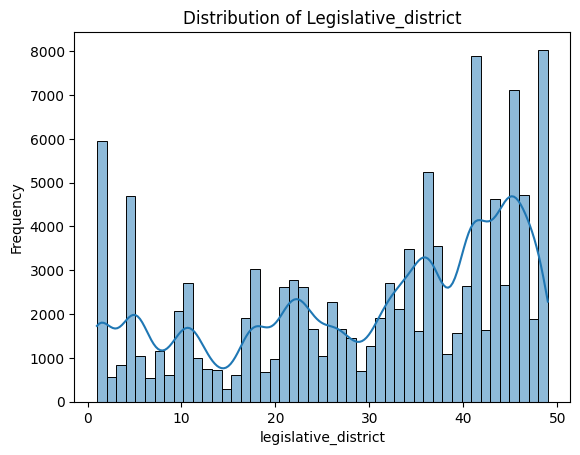

In [77]:
sns.histplot(data=df.legislative_district, kde=True)
plt.gca().set_title("Distribution of Legislative_district")
plt.gca().set_xlabel("legislative_district")
plt.gca().set_ylabel("Frequency")
plt.show()

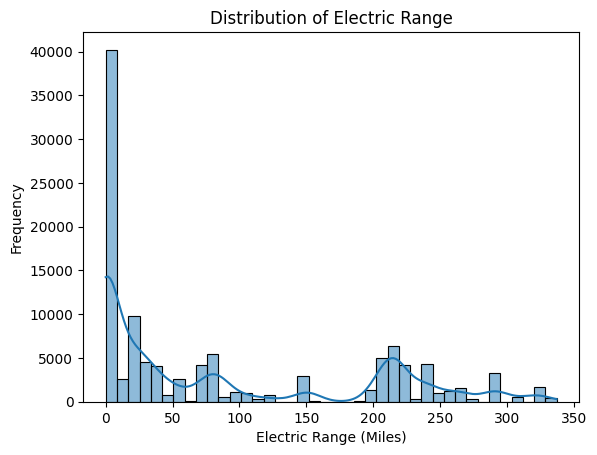

In [78]:
sns.histplot(data=df.electric_range, kde=True)
plt.gca().set_title("Distribution of Electric Range")
plt.gca().set_xlabel("Electric Range (Miles)")
plt.gca().set_ylabel("Frequency")
plt.show()

<ipython-input-79-8bb57685b65e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

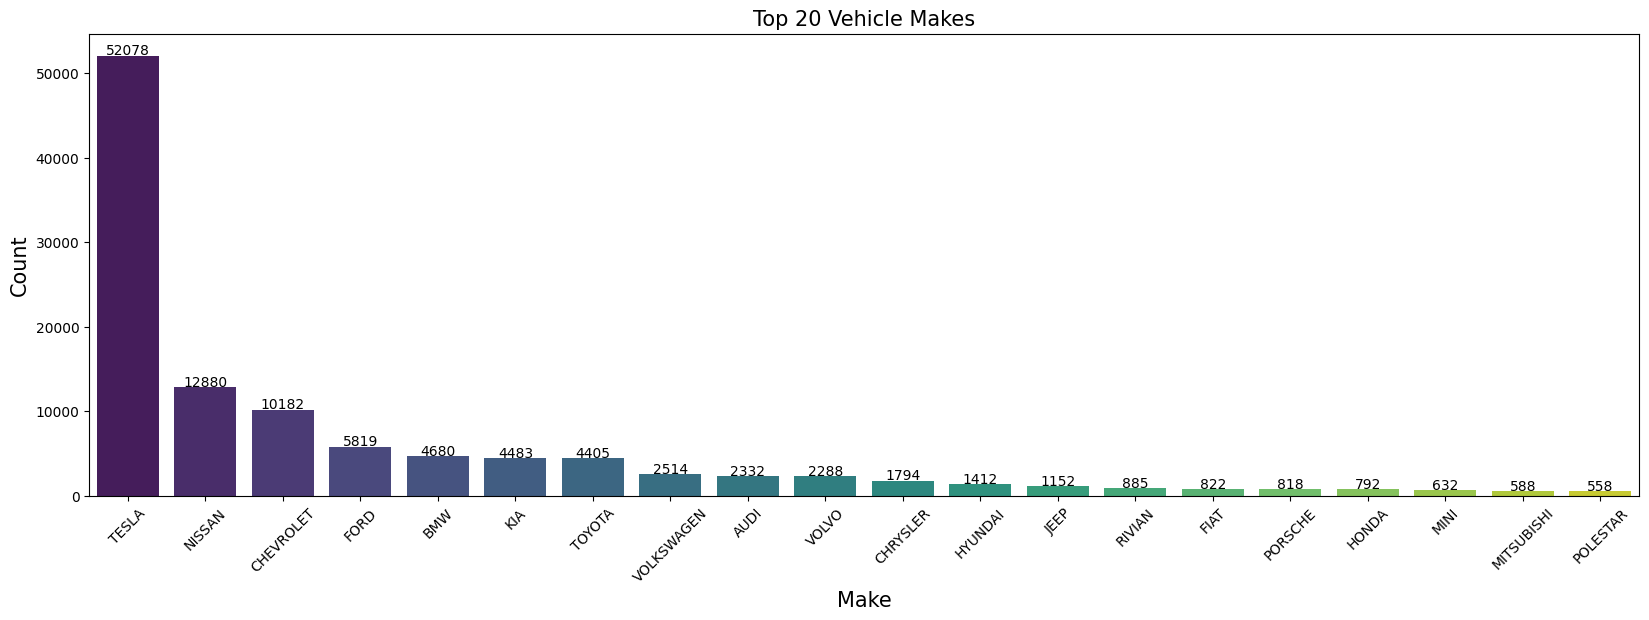

In [79]:
plt.figure(figsize=(20,6))
sns.barplot(x=df['make'].value_counts().nlargest(20).index,
            y=df['make'].value_counts().nlargest(20).values,
            palette='viridis')

plt.title("Top 20 Vehicle Makes", fontsize=15)
plt.xlabel("Make", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=45)

# Add count labels
for i, count in enumerate(df['make'].value_counts().nlargest(20).values):
    plt.text(i, count + 100, str(count), ha="center", fontsize=10)

plt.show()

<ipython-input-80-39bb58c4f6fa>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



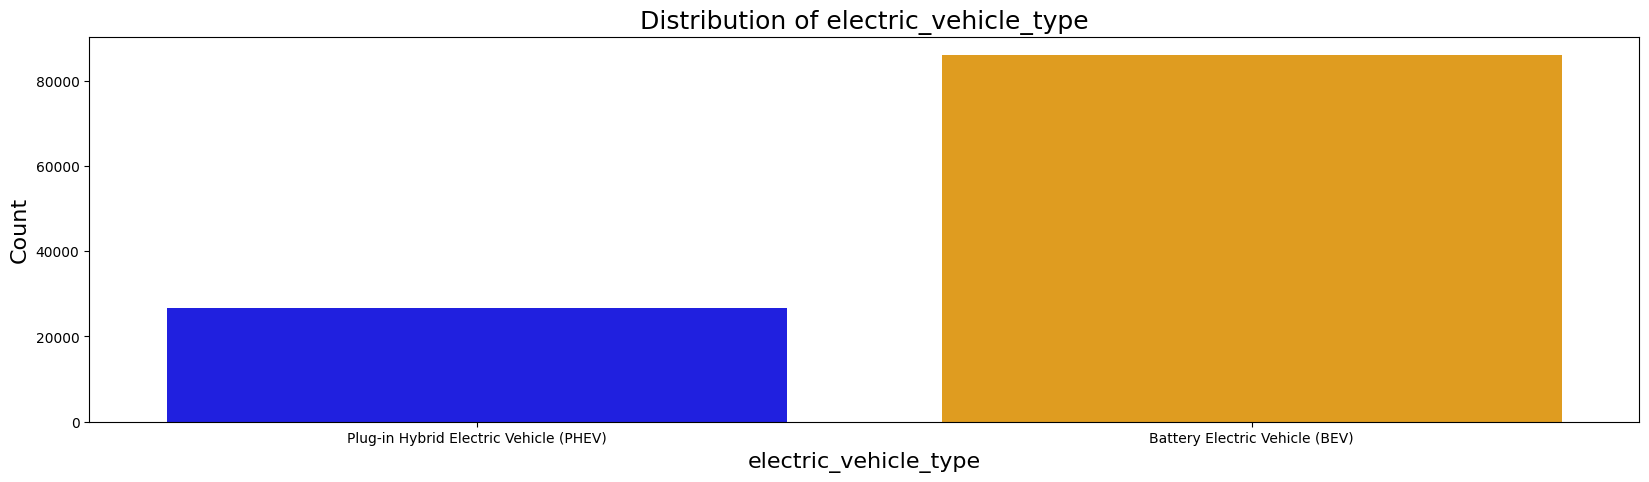

In [80]:
plt.figure(figsize=(20,5))
sns.countplot(x="electric_vehicle_type",data=df, palette=["blue", "orange"])
plt.gca().set_title("Distribution of electric_vehicle_type",fontsize = 18)
plt.gca().set_xlabel("electric_vehicle_type",fontsize = 16)
plt.gca().set_ylabel("Count",fontsize = 16)
plt.show()

Bivariate Analysis


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



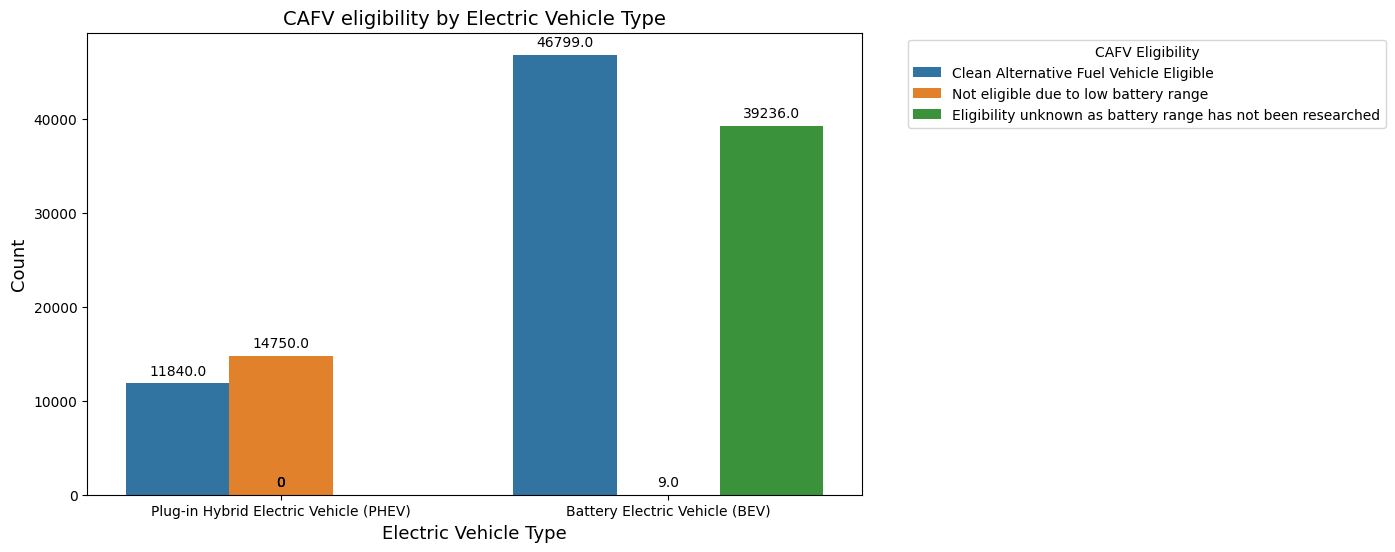

In [81]:
plt.figure(figsize=(10, 6))
x = sns.countplot(x='electric_vehicle_type', hue='clean_alternative_fuel_vehicle_(cafv)_eligibility', data=df)

# Annotating each bar with its height
for p in x.patches:
    height = p.get_height()
    x.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# Setting title and labels
plt.gca().set_title("CAFV eligibility by Electric Vehicle Type", fontsize=14)
plt.gca().set_xlabel("Electric Vehicle Type", fontsize=13)
plt.gca().set_ylabel("Count", fontsize=13)
plt.legend(title="CAFV Eligibility", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


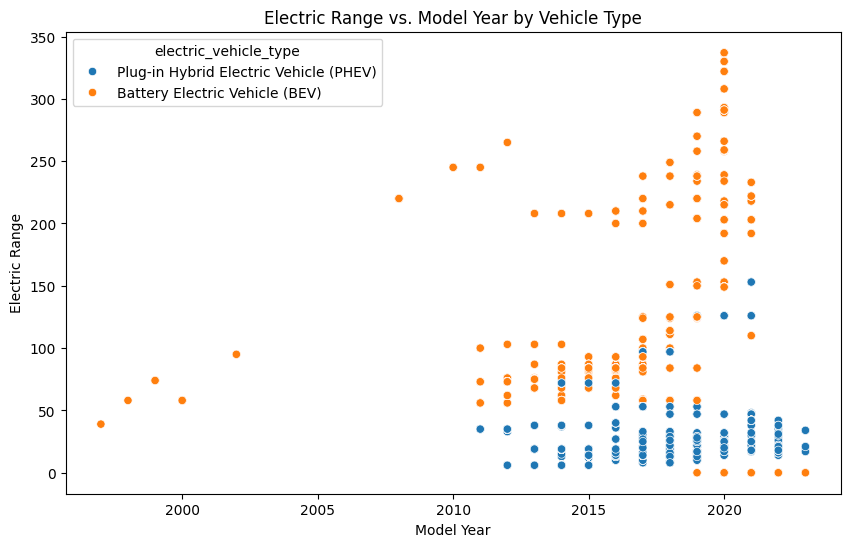

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='electric_range', hue='electric_vehicle_type', data=df)
plt.title('Electric Range vs. Model Year by Vehicle Type')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()


 Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [83]:
# prompt:  Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

import plotly.express as px

# Assuming 'vehicle_location' represents geographical locations
# You may need to adjust this based on your actual data
location_counts = df['vehicle_location'].value_counts().reset_index()
location_counts.columns = ['location', 'count']

# Create Choropleth map
fig = px.choropleth(location_counts,
                    locations='location',
                    locationmode='country names',  # Adjust based on your data
                    color='count',
                    hover_name='location',
                    title='Number of EV Vehicles by Location',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


In [84]:
import plotly.express as px

# Group the data by state and count the number of EVs
count_by_state = df.groupby("state").size().reset_index(name="count")
# Create the choropleth map
fig = px.choropleth(
 count_by_state,
 locations="state",
 color="count",
 locationmode="USA-states",
 scope="usa",
 labels={"count": "NO OF EV's"}, # Correct label mapping
 title="Number of EVs by State"
)
# Update layout for the map (correct syntax)
fig.update_layout(
 geo=dict(bgcolor='rgba(0,0,0,0)'), # Setting transparent background
 title_x=0.5 # Center the title
)
# Show the figure
fig.show()

Create a Racing Bar Plot to display the animation of EV Make and its count each year.


In [85]:
# prompt: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

import plotly.express as px
import pandas as pd

# Group the data by model year and make, then count the number of vehicles
make_counts_by_year = df.groupby(['model_year', 'make']).size().reset_index(name='count')

# Create the racing bar chart
fig = px.bar(make_counts_by_year,
             x='make',
             y='count',
             animation_frame='model_year',
             range_y=[0, make_counts_by_year['count'].max() + 100],  # Adjust range for better visualization
             title='EV Make Popularity Over Time')

# Update layout for better appearance
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [86]:
pip install bar-chart-race

In [87]:
import bar_chart_race as bcr

df_ev=df.groupby(['model_year','make']).size().reset_index(name='count')

In [88]:
df_ev.head()

,model_year,make,count
0,1997,CHEVROLET,1
1,1998,FORD,1
2,1999,FORD,3
3,2000,FORD,10
4,2002,TOYOTA,2


In [89]:
df_ev.shape

(209, 3)

In [90]:
import plotly.express as px
# Create the animated racing bar plot with annotations
fig = px.bar(df_ev,x ='model_year',
 y='make', # Place Make on y-axis
 animation_frame='model_year',
 animation_group='make',
 range_x=[0, 10000],
 hover_name="make",
 hover_data=['count'],
 title="EV Make over time",
 labels=dict(number_of_Vehicles="Number of EV Vehicles", model_year="Model Year"))
color='make', # Color each make differently
animation_frame='model_year', # Create animation by year
orientation='h', # Horizontal bar chart
title='EV Makes and their Count Over the Years',
labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
range_x=[0, 3000]

# Update traces for displaying values
fig.update_traces(texttemplate='%{x}', # Display the actual x-axis values (Number_
 textposition='outside', # Place the text outside the bars
 textfont_size=16) # Adjust the font size for better readability
# Adjust the layout for improved visibility and emphasis on movement
fig.update_layout(
 xaxis=dict(showgrid=True, gridcolor='LightGray'), # Show grid for better visib
 yaxis_title='EV Makes',
 xaxis_title='Number of EV Vehicles',
 showlegend=False, # Hide legend as it's not necessary for this chart
 title_x=0.5, # Center title
 title_font=dict(size=20), # Increase title font size
 margin=dict(l=50, r=50, t=50, b=50), # Adjust margins
 width=800, # Set a fixed width
 height=600 # Set a fixed height
)
# Show the plot
fig.show()